In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
from collections import defaultdict
import numpy as np
import seaborn as sns
from scipy.stats import norm
from astropy import visualization

In [2]:
df = pd.read_csv(os.getcwd() + '/data/data_F5_d3r3_barcode.csv', usecols = [1,2,3,4])
count_afPCR = df.groupby('payloadID')['barcode_count_afPCR'].aggregate(np.sum)
count_bfPCR = df.groupby('payloadID')['barcode_count_bfPCR'].last()

In [47]:
df

,payloadID,barcode_seq,barcode_count_afPCR,barcode_count_bfPCR
0,2,GTTTTGCTGAGAGAAGCCTGACGCC,8,1
1,3,GGAACACTCGGTTGCTCTCTCCGAC,4,2
2,3,CCATACATCGAGGCGTGTCGCTCTC,20,2
3,6,CTTAATCTAGGTTTGCCCCAAGGAG,4,1
4,7,AAAGGATTGATCTCAAGAGGTCACG,12,2
5,7,GTCTGTTGTCGGCCGTACTAGCTAA,8,2
6,8,TCTGCGCAAGGACATTTAGGTGGTT,8,2
7,8,CTTTAAAGGGTTGCGGTAGTGTGAG,4,2
8,10,GTAGTCAGTTTTTCGCCTACGTGAG,4,3
9,10,GGTTTACGAGAAGTAAGGCTAAATT,16,3


In [30]:
df = pd.read_csv(os.getcwd() + '/data/data_F5_d3r3_barcode.csv', usecols = [1,2,3,4])
count_afPCR = df.groupby('payloadID')['barcode_count_afPCR'].aggregate(np.sum)
count_bfPCR = df.groupby('payloadID')['barcode_count_bfPCR'].last()

ideally_seen_oligos = set(range(457772))
seen_oligos = set(count_bfPCR.index)
no_cov_oligos = ideally_seen_oligos.difference(seen_oligos)
no_cov_oligos_series = pd.Series(np.zeros(len(no_cov_oligos),dtype=int), index=list(no_cov_oligos))
count_afPCR_all = count_afPCR.append(no_cov_oligos_series)
count_bfPCR_all = count_bfPCR.append(no_cov_oligos_series)

afPCR_meanCount = np.mean(count_afPCR_all)
bfPCR_meanCount = np.mean(count_bfPCR_all)
count_afPCR_norm = [float(val)/afPCR_meanCount for val in count_afPCR_all]
count_bfPCR_norm = [float(val)/bfPCR_meanCount for val in count_bfPCR_all]

In [33]:
len(count_bfPCR_norm)

457772

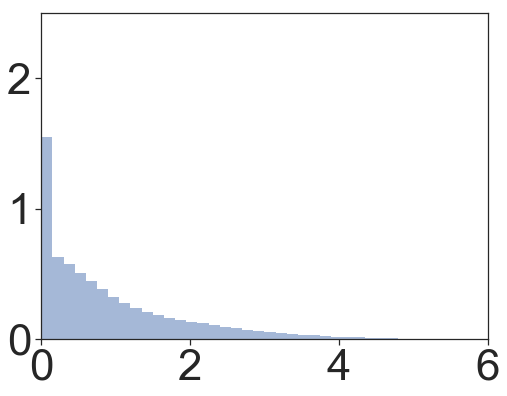

In [94]:
from scipy.stats import norm
sns.set_style("ticks")
plt.matplotlib.rcParams.update({'font.size':20})
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.set(font_scale=4)
#(a,b,c) = visualization.hist(count_bfPCR_norm, bins="blocks", normed=True, alpha=0.5, label="UMI")
(count, bin_edges,_) = ax1.hist(count_bfPCR_norm, bins=np.arange(0,6.1,0.15), density=True, edgecolor="none", alpha=0.5)
#sns.distplot(count_bfPCR_norm, kde=False, fit=norm)
ax1.set_xlim([0,6])
ax1.set_ylim([0,2.5])
#ax1.set_yticks(np.arange(0,2.6,0.5))
#ax1.set_xticks(np.arange(0,7,1))
#ax1.set_ylabel('Density')
#ax1.set_xlabel('Norm. coverage')
plt.savefig("./fig/fig_190802_Barcode_distribution.png", bbox_inches="tight", dpi=300, fmt="png")

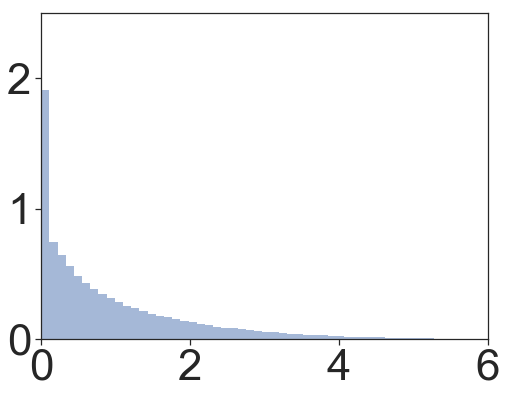

In [93]:
sns.set_style("ticks")
plt.matplotlib.rcParams.update({'font.size':20})
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.set(font_scale=4)
#sns.distplot(count_afPCR, bins=500, kde=False, norm_hist=True)
#(a,b,c) = visualization.hist(count_afPCR_norm, bins="blocks", normed=True, alpha=0.5)
(count, bin_edges,_) = ax1.hist(count_afPCR_norm, bins=np.arange(0,6.1,0.11), density=True, edgecolor="none", alpha=0.5)
#ax1.set_ylabel('Density')
#ax1.set_xlabel('Norm. coverage')
ax1.set_xlim([0,6])
ax1.set_ylim([0,2.5])
#ax1.set_yticks(np.arange(0,2.6,0.5))
#ax1.set_xticks(np.arange(0,7,1))
plt.savefig("./fig/fig_190802_PCR_distribution.png", bbox_inches="tight", dpi=300, fmt="png")